# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np 

warnings.filterwarnings('ignore')
%matplotlib inline

In [197]:
df = pd.read_csv('../data/liquor_store_sales.csv')
df.head()


,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<BarContainer object of 20 artists>

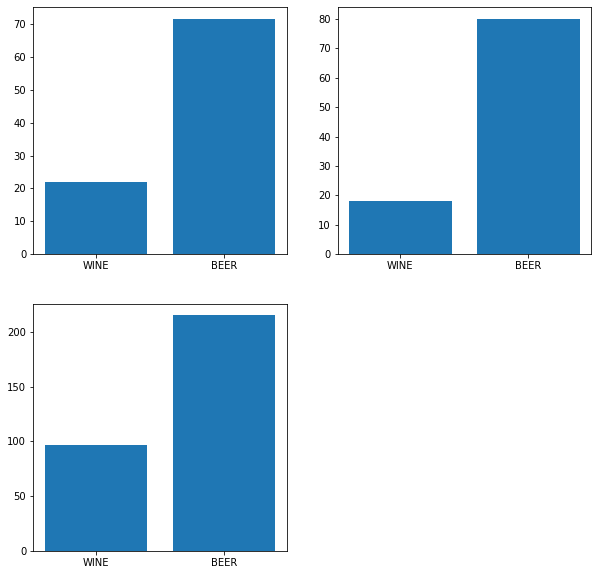

In [198]:
df_mod = df.loc[df['ItemType'].isnull() == False]
df_mod = df_mod.loc[(df['RetailSales'] != 0) & (df['RetailTransfers'] != 0) & (df['WarehouseSales'] != 0)]

tipo = df_mod['ItemType'].head(20)
sales = df_mod['RetailSales'].head(20)
transfers = df_mod['RetailTransfers'].head(20)
warehouse = df_mod['WarehouseSales'].head(20)
fig = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.bar(tipo,sales)
plt.subplot(2,2,2)
plt.bar(tipo,transfers)
plt.subplot(2,2,3)
plt.bar(tipo,warehouse)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Text(0.5, 1.0, "Top suppliers' sales")

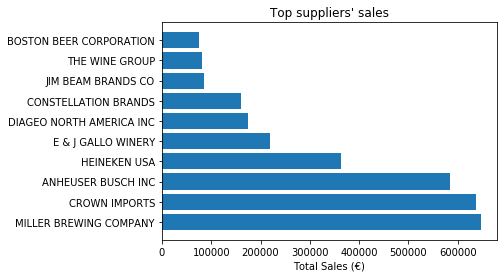

In [199]:
#Create a new column with the sum of the three types of sales.
sale_types = ['RetailSales', 'WarehouseSales', 'RetailTrans']
df['TotalSales'] = df['RetailSales'] + df['WarehouseSales']+df['RetailTransfers']

#Group the dataframe by Supplier and sort it according to its TotalSales value
reduced = df.groupby('Supplier').agg({'TotalSales': sum}).sort_values('TotalSales').tail(10)

#10 top suppliers and their total sales values in two separate lists (I am going to plot this)
top_suppliers = reduced.index.tolist()
av_sales = reduced['TotalSales'].tolist()

#Plotting
fig, ax = plt.subplots()
ax.barh(top_suppliers, av_sales, xerr=range(10), align='center')
ax.set_yticks(top_suppliers)
ax.set_yticklabels(top_suppliers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Sales (€)')
ax.set_title("Top suppliers' sales")



## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

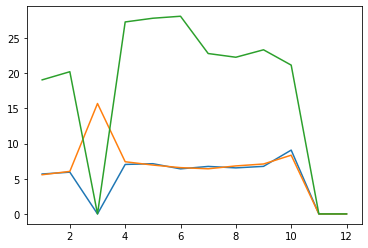

In [200]:
#New df grouped by month and 3 columns with the mean sales for each type of sale
types_of_sale = ['RetailSales','RetailTransfers','WarehouseSales']
bymonth = df.groupby('Month').agg({'RetailSales': 'mean','RetailTransfers': 'mean','WarehouseSales': 'mean'})

#There are no values for March and July so we add them
bymonth.loc[3] = [0,0,0]
bymonth.loc[7] = [0,0,0]

[plt.plot(range(1,13), sale, data = bymonth) for sale in types_of_sale];


## 4. Plot the same information as above but as a bar chart.

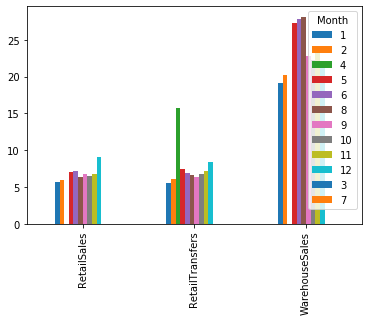

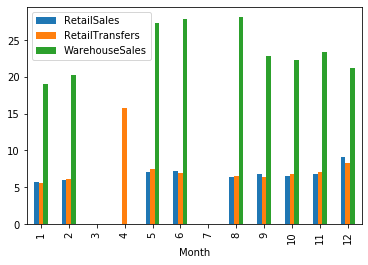

In [259]:
bymonth.T.plot.bar()
bymonth.groupby('Month').mean().plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [256]:
multi = df.groupby(['ItemType','Year','Month']).agg({'RetailSales':'sum'}).get_group(('Beer',2017))
test = multi.head(10)
test.plot()
tic = []
for elem in test.index:
    prod, year, month = elem
    tic.append(str(year)+', '+str(month))
plt.xticks(range(10),tic, rotation=90)




AttributeError: 'DataFrame' object has no attribute 'get_group'

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

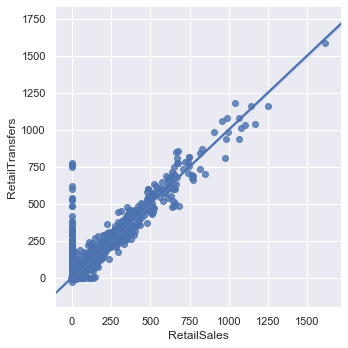

In [260]:
sns.set(color_codes=True)

sp = sns.lmplot(x = "RetailSales", y = "RetailTransfers", data = df)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

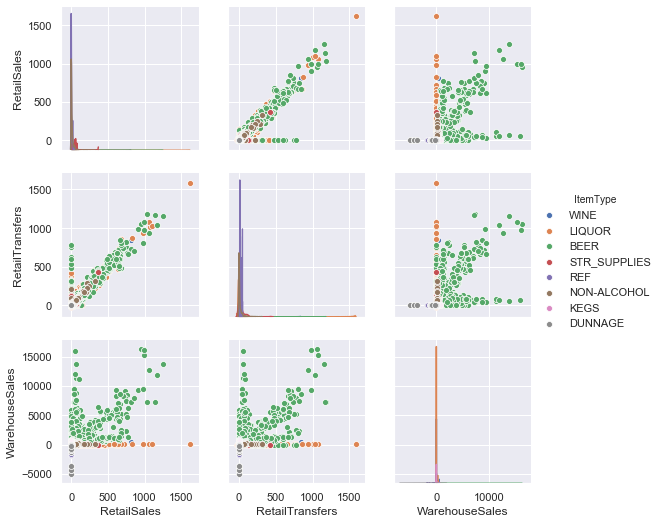

In [261]:
result = df[['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]
last = sns.pairplot(result, hue="ItemType")